<a href="https://colab.research.google.com/github/wmhowarth/Prediction-of-Product-Sales/blob/main/Project1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prediction of Product Sales

- Author: Warren Howarth

## Project Overview




## Load and Inspect Data




## Clean Data

## Exploratory Data Analysis

## Explanatory Data Analysis

## Feature Inspection



## Loading Data

In [3]:
import pandas as pd


In [4]:
df_sales = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

In [5]:
# View first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# View schema data using .info()
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

-Duplicates
-- There are no duplicates

In [7]:
df_sales.duplicated().sum()

0

In [8]:
df_sales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [9]:
duplicate_items = df_sales.duplicated()
duplicate_items

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [10]:
df_sales[duplicate_items]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


- Changing Data Types

In [11]:
cat_cols = df_sales.select_dtypes('object').columns

In [12]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
# Outlet size - defined as 'The size of the store in terms of ground area covered' should probably be float
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# maybe not
# let's look at the other values in the object columns
for name in cat_cols:
  print(f'The values for {name}')
  print(df_sales[name].value_counts())
  print('\n')

The values for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The values for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The values for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The values for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035  

In [15]:
# the 'object' columns look good
# now for the numeric columns
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# let's look at the values in the numeric columns
for name in num_cols:
  print(f'The values for {name}')
  print(df_sales[name].value_counts())
  print('\n')

The values for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


The values for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


The values for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


The values for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


The values for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    1

- Item_MRP - (maximum retail price, monetary amount - round to 2 decimals ?)
- Item_Outlet_Sales - (Sales of the product per store, not sure in monetary amount (round to 2 decimals) or unit amount (integer value))


## Missing values

<Axes: >

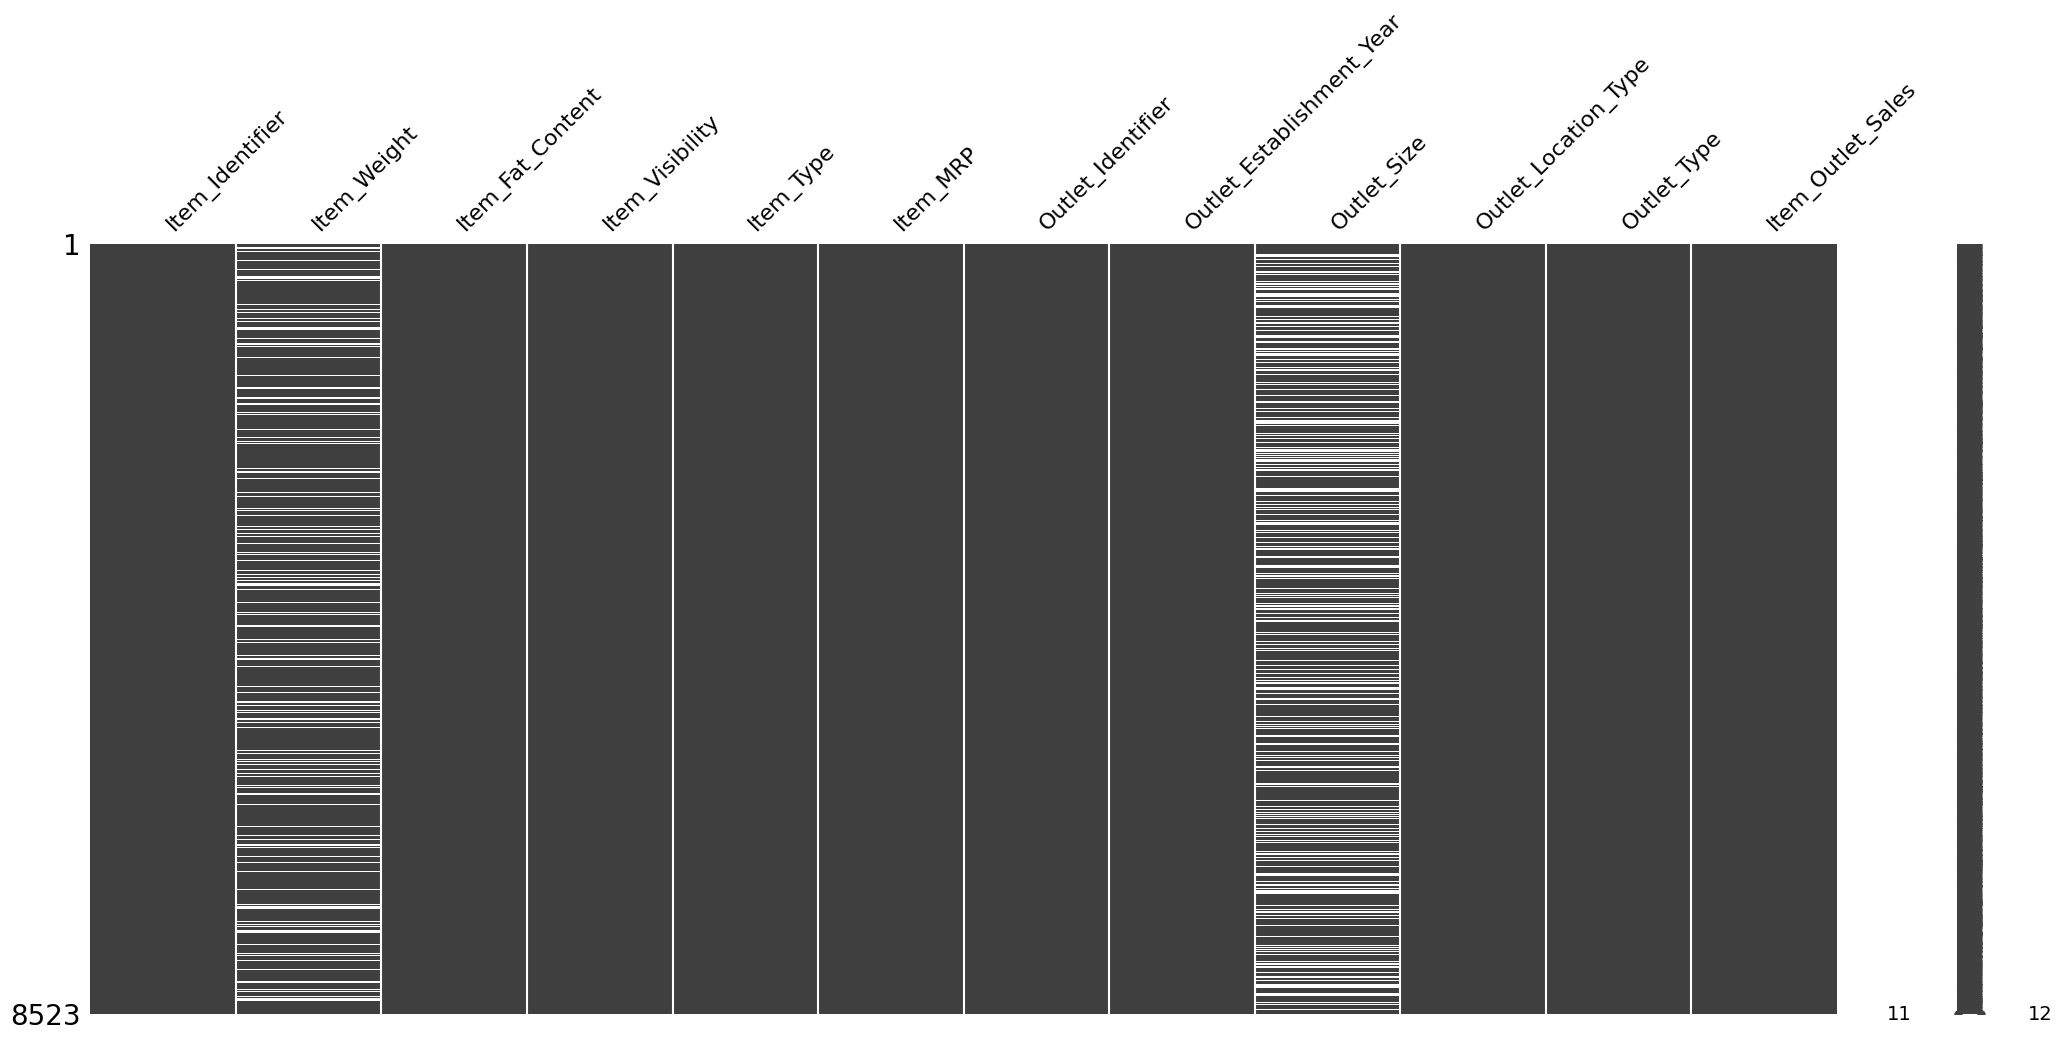

In [17]:
# Using missingno matrix
import missingno as msno
msno.matrix(df_sales)

In [18]:
# Using panda for 'Item_Weight'
df_sales['Item_Weight'].isna().sum()

1463

In [19]:
# As percentage
(df_sales['Item_Weight'].isna().sum() / len(df_sales)) * 100

17.165317376510618

In [20]:
# replace with -1
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [21]:
# recheck
df_sales['Item_Weight'].isna().sum()

0

In [22]:
# Using Panda for 'Outlet_Size'
df_sales['Outlet_Size'].isna().sum()

2410

In [23]:
# As percentage
(df_sales['Outlet_Size'].isna().sum() / len(df_sales)) * 100

28.27642848762173

In [24]:
# Replace with 'MISSING'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [25]:
# recheck
df_sales['Outlet_Size'].isna().sum()

0

<Axes: >

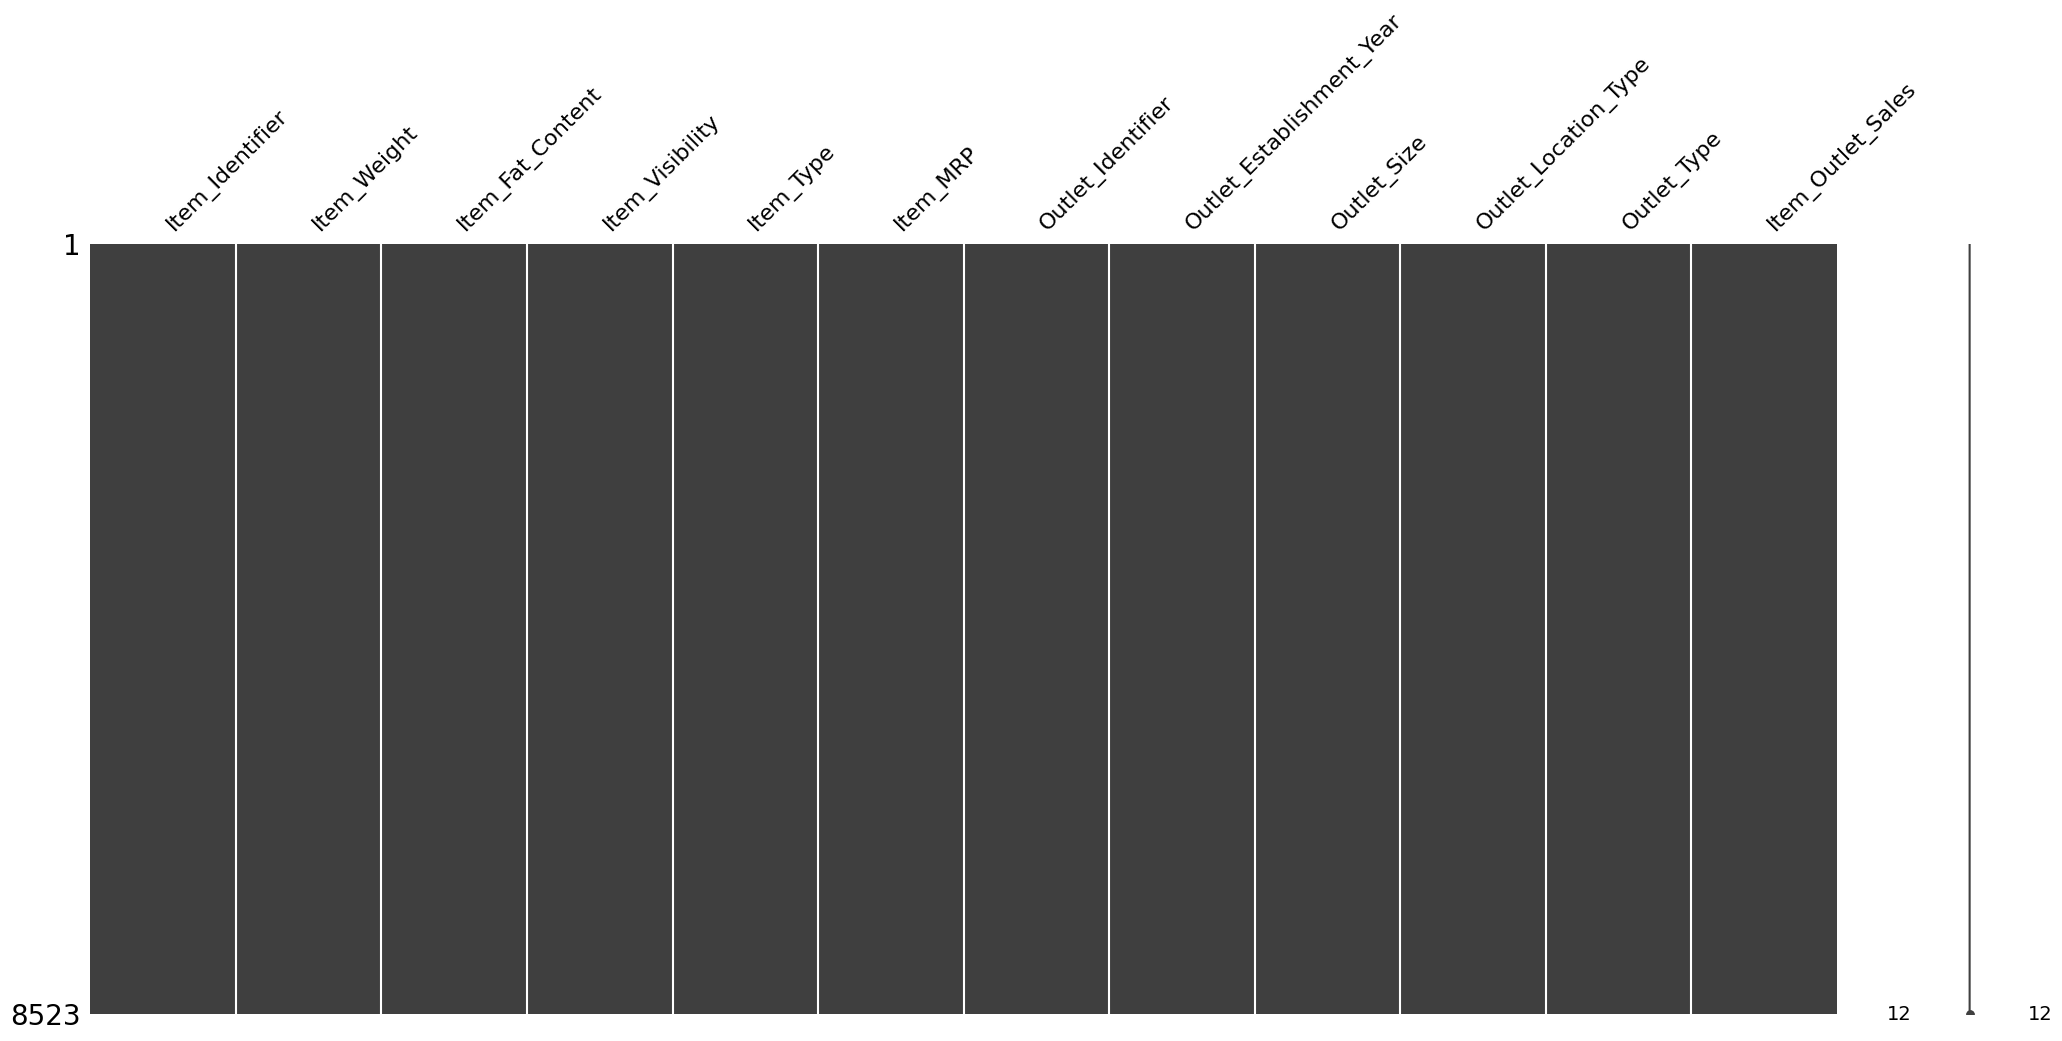

In [26]:
# Recheck for missing data usinf missingno matrix
msno.matrix(df_sales)

## Statistical info of the number columns


In [27]:
df_sales.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0,8523.0,8523.0,8523.0,8523.0
mean,10.0,0.0,141.0,1998.0,2181.0
std,7.0,0.0,62.0,8.0,1706.0
min,-1.0,0.0,31.0,1985.0,33.0
25%,7.0,0.0,94.0,1987.0,834.0
50%,11.0,0.0,143.0,1999.0,1794.0
75%,16.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


In [29]:
# Save the file to the drive
fout = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/Project1.csv'
df_sales.to_csv(fout)

# Week 3
## Vizualizations


In [30]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [32]:
# import the data
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/Project1.csv'
df = pd.read_csv(fname)
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [37]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Unnamed: 0', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- Histograms
-- Used to compare 2 values
-- `Lets examine the Item Market Retail Price`

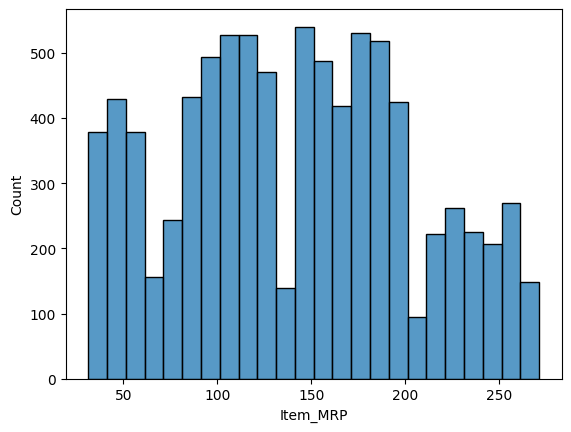

In [41]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_MRP', binwidth = 10)

It doesn't look like this is useful at all

So we will try other features

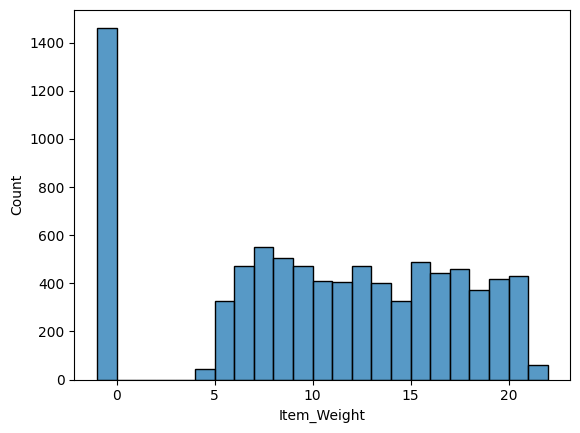

In [43]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_Weight', binwidth = 1)

We previously updated the Missing values to -1, so that is the reason there are so many. Once again, it is not a useful metric

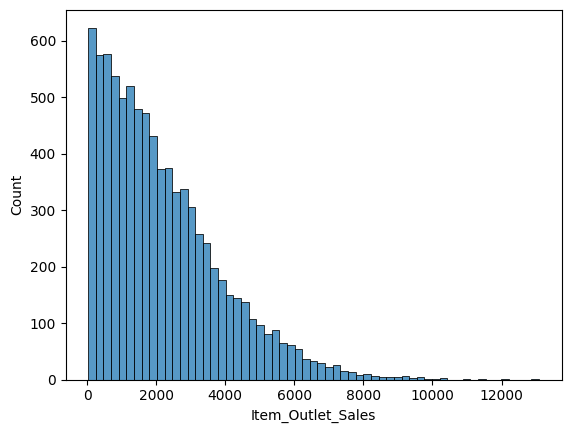

In [48]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')

- Boxplots
-- Statistical Summaries

In [49]:
# We will use .describe() to get the info on quartiles
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

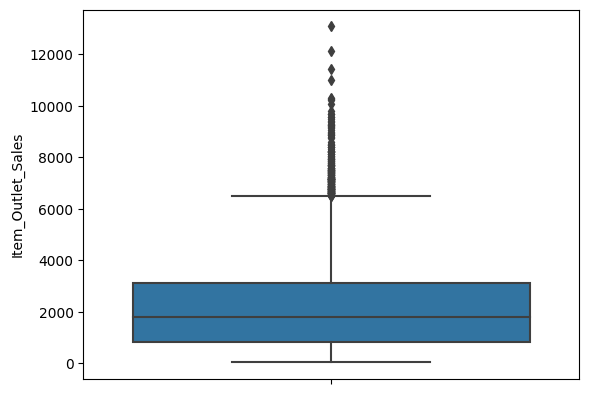

In [50]:
# Using Seaborn
ax = sns.boxplot(data = df, y = 'Item_Outlet_Sales')

There are a number of outliers over the maximum value

- Countplots
-- To view the categorical amounts

In [51]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [52]:
df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [53]:
# look at the item_type value_counts
val_counts = df['Item_Type'].value_counts()
val_counts

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

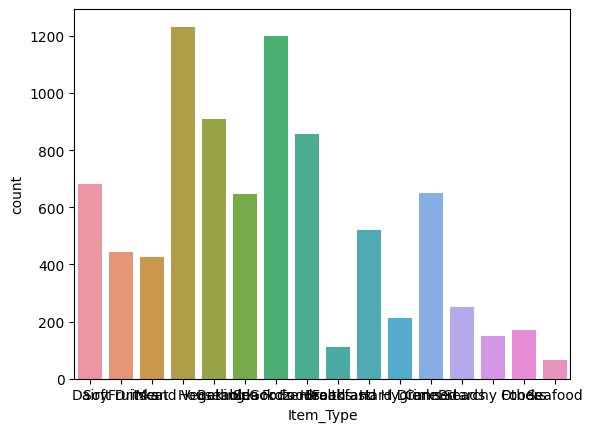

In [54]:
# Using Seaborn
ax = sns.countplot(data = df, x = 'Item_Type')

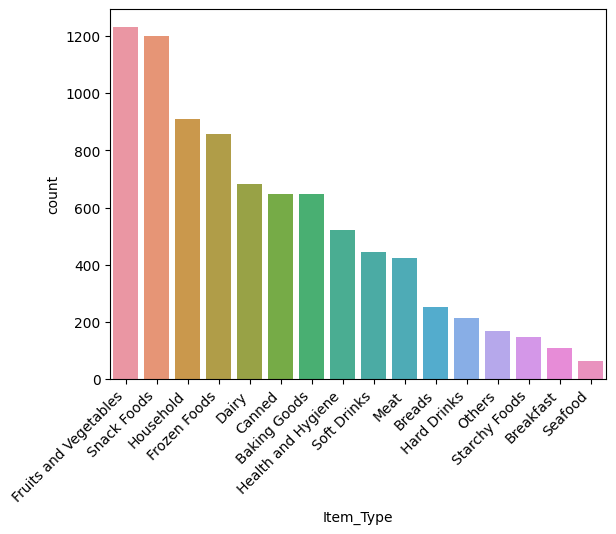

In [58]:
# Now order them in descending order and neaten the graph
ax = sns.countplot(data = df, x = 'Item_Type', order = val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

You can see that Fruits and Vegetables, Snack Foods, Household and Frozen Foods were the best sellers in terms of nmber of items sold

- Heatmaps
-- The correlation between numeric items

In [59]:
# Using .corr() on the dataframe using numeric_only = True
corr = df.corr(numeric_only = True)
corr.round(2)

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Unnamed: 0,1.00,-0.03,-0.00,0.00,0.00,-0.01
Item_Weight,-0.03,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.00,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.00,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.00,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.01,-0.06,-0.13,0.57,-0.05,1.00


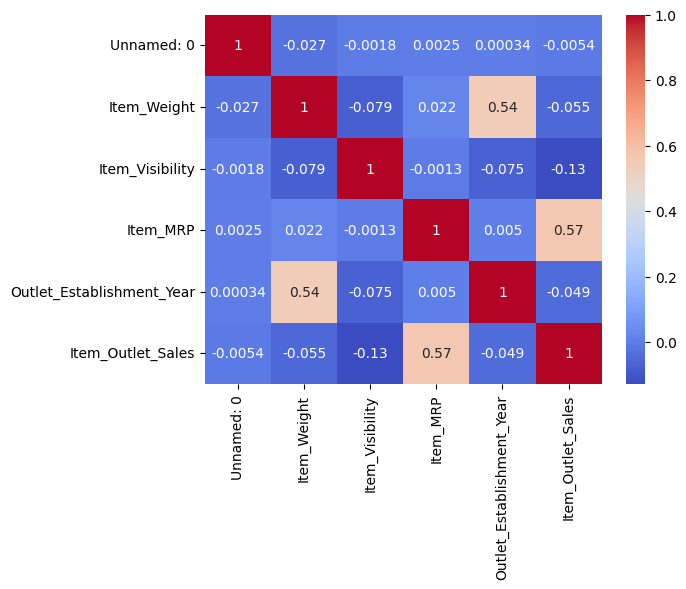

In [61]:
# Create the heatmap
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

There is a positive relationship between Item_Price and Item_Outlet_Sales, which is to be expected.
There is also a positive relationship between Outlet_Establishment_Year and Item_Weight, which is less obvious

In [62]:
# Save the file to the drive
fout = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week04/Data/Project1.csv'
df.to_csv(fout)